In [1]:
!pip install -Uqq fastbook
import fastbook

fastbook.setup_book()

In [2]:
# hide
from fastai.vision.all import *

from fastbook import *

matplotlib.rc("image", cmap="Greys")

In [5]:
URLs.MNIST_TINY

'https://s3.amazonaws.com/fast-ai-sample/mnist_tiny.tgz'

In [6]:
path = untar_data(URLs.MNIST_TINY)

In [7]:
# data được download on hidden files of fastai
path

Path('/home/nghiaht7/.fastai/data/mnist_tiny')

In [10]:
Path.BASE_PATH = path

In [11]:
path

Path('.')

In [12]:
path.ls()

(#5) [Path('train'),Path('labels.csv'),Path('models'),Path('valid'),Path('test')]

In [17]:
(path / "train").ls()

(#2) [Path('train/7'),Path('train/3')]

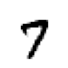

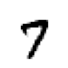

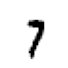

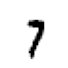

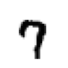

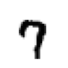

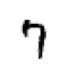

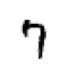

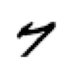

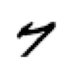

In [66]:
sevens_ts_train = torch.stack([tensor(Image.open(o)) for o in (path / "train/7").ls()])
# why float
sevens_ts_train = sevens_ts_train.float() / 255

sevens_ts_valid = torch.stack([tensor(Image.open(o)) for o in (path / "valid/7").ls()])
sevens_ts_valid = sevens_ts_train.float() / 255


for i in range(5):
    show_image(sevens_ts_train[i]), show_image(sevens_ts_valid[i])

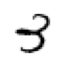

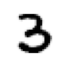

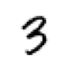

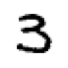

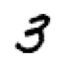

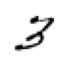

In [67]:
threes_ts_train = torch.stack([tensor(Image.open(o)) for o in (path / "train/3").ls()])
threes_ts_train = threes_ts_train.float() / 255

threes_ts_valid = torch.stack([tensor(Image.open(o)) for o in (path / "valid/3").ls()])
threes_ts_valid = threes_ts_valid.float() / 255


for i in range(3):
    show_image(threes_ts_train[i]), show_image(threes_ts_valid[i])

<AxesSubplot:>

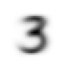

In [68]:
mean_3 = threes_ts_train.mean((0))
show_image(mean_3)

<AxesSubplot:>

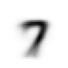

In [69]:
mean_7 = sevens_ts_train.mean((0))
show_image(mean_7)

In [80]:
ex_3 = threes_ts_train[4]

df = pd.DataFrame(ex_3[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196078,0.231373,0.105882,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027451,0.137255,0.603922,0.843137,0.968627,0.992157,0.909804,0.372549
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262745,0.662745,0.992157,0.992157,0.996078,0.847059,0.898039,0.992157,0.874510
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.423529,0.980392,0.992157,0.905882,0.541176,0.074510,0.082353,0.850980,0.992157,0.576471
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141176,0.549020,0.607843,0.133333,0.000000,0.000000,0.372549,0.992157,0.929412,0.141176
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145098,0.937255,0.996078,0.458824,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180392,0.584314,0.992157,0.670588,0.098039,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109804,0.803922,0.996078,0.937255,0.094118,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121569,0.482353,0.917647,0.917647,0.929412,0.992157,0.996078,0.266667,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207843,0.850980,0.996078,0.992157,0.992157,0.992157,0.992157,0.996078,0.886275,0.384314,0.000000,0.000000


In [75]:
threes_ts_train.shape

torch.Size([346, 28, 28])

In [81]:
def mnist_distance(a, b):
    return (a-b).abs().mean((-1, -2))


mnist_distance(mean_3, ex_3)

tensor(0.1267)

In [82]:
def is_3(im):
    return mnist_distance(mean_3, im) < mnist_distance(mean_7, im)


is_3(ex_3)

tensor(True)

In [96]:
print(train_3_acc := (is_3(threes_ts_train).float().mean()))
print(train_7_acc := (1 - is_3(sevens_ts_train).float().mean()))

print(valid_3_acc := (is_3(threes_ts_valid).float().mean()))
print(valid_7_acc := (1- is_3(sevens_ts_valid).float().mean()))

tensor(0.8439)
tensor(0.9917)
tensor(0.9335)
tensor(1.)
